<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/(i)Data_preprocessing_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from io import StringIO
import sys
import numpy as np
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
#count the number of missing value
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [ ]:
#transform df into numpy array
n=df.values
n.shape

(3, 4)

# Drop Nan Value



In [ ]:
# drop missing value
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# additional parameter for dropna
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# drop row that have fewer 4 real value
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# drop only nan row appear in C column
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN



Draw back of drop nan
1.   analyse impossible when removing too many datapoint



# Compute Missing Value

In [ ]:
#interpolation technique
#mean imputation, replace nan by mean of that col
#use SimpleImputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.values)
imputed_data=imp.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# we can change the strategy by median, most_frequent
imp_median=SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df.values)
imp_median=imp_median.transform(df.values)
imp_median

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df.values)
imputed_data=imp.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [10., 11., 12.,  4.]])

In [ ]:
# using pandas to fillnan method
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


Understand more about scikit-learn estimator API

-SimpleImputer: is a class belong to **transformer class** in scikit-learn, for data transformation

-Classifier(SVM,Perceptron,..): belong to **estimator class** in scikit-learn, for data training. have Predict method
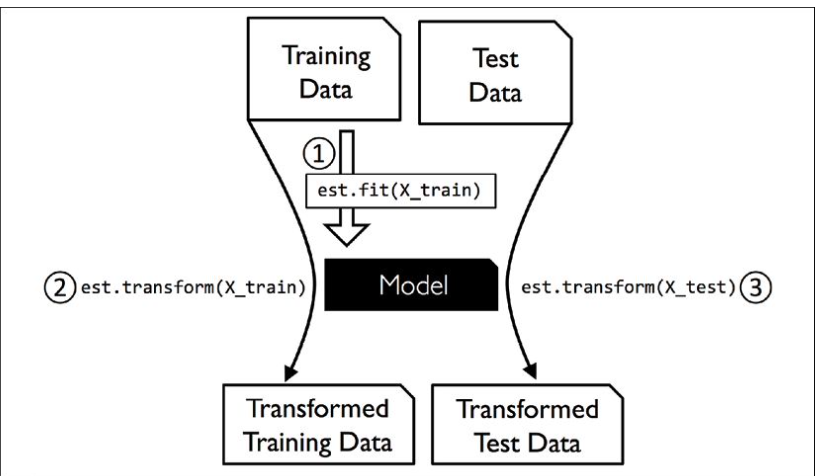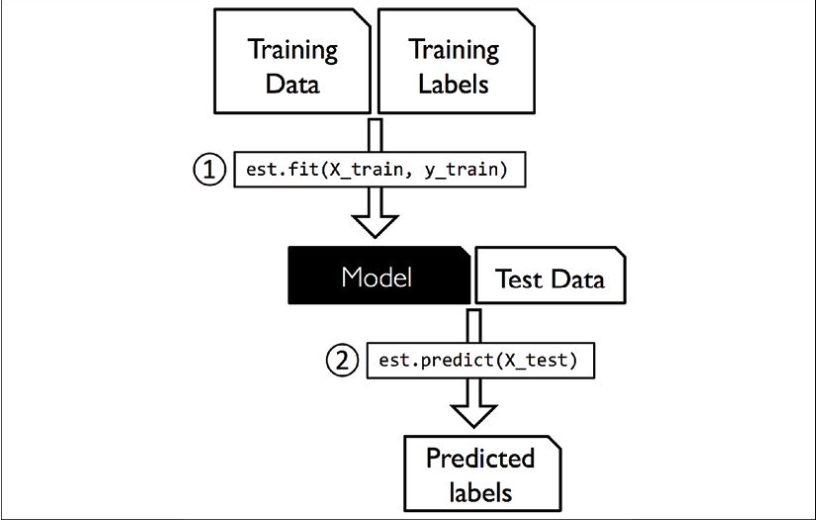

# Handing Categorical Data

Ordinal features: 

ex: t-shirt size: XL -> L >M

Nomial features:

ex: t-shirt colors: 

In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
# color att is nomial feature
# size att is ordinal feature

In [ ]:
# mapping ordinal feature
# we need to convert ordinal feature into integer
size_mapping={'XL':3, 'L':2,'M':1}
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
from scipy.linalg.matfuncs import inv
inv_size_mapping={v: k for k, v in size_mapping.items()}
df['size']=df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
# if the label are in nomial category
# -> need to encode that
class_mapping={label: v for v,label in enumerate(np.unique(df['classlabel']))}
inv_class_mapping={v:k for k,v in class_mapping.items()}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [ ]:
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


fit_transform is called fit+transform separately


LabelEncoder is transformer class

In [ ]:
# we can use LabelEncoder to encode classlabel
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [ ]:
# inverse encode
m=class_le.inverse_transform(y)
m

array(['class2', 'class1', 'class2'], dtype=object)

In [ ]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
#perform one-hot encoding on nomial features
X=df[['color','size','price']].values
color_le=LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0]) # encode label of color att
# doing like this make the algorithm compare value in nomial feature, ex: red > blue (1>0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X=df[['color','size','price']].values
ohe=OneHotEncoder()
# reshape(1,-1) like transpose of vector
print(X[:,0].reshape(-1,1))
ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()


[['green']
 ['red']
 ['blue']]


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X=df[['color','size','price']].values
c_transf=ColumnTransformer([
    ('onehot',OneHotEncoder(),[0])
])

c_transf.fit_transform(X)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [ ]:
#Encoding Ordinal Features


# Partition dataset into train and test dataset


In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)


In [ ]:
np.bincount(y_test)

array([ 0, 18, 21, 15])

# Feature Scaling

bring value to range [0,1]
can use min-max scaling (normalization) or standardization

Almost all machine learning alogth need feature scaling (exepect randomforest)

There are reason why to choose standardization:
> -> retain outliers, save valuable info

> -> weight initalize near to zero, so as to feature!


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
mms=MinMaxScaler()
stdsc=StandardScaler()
rs=RobustScaler()

Note that StandardScaler only fit to train_data, then transform to test data

In [ ]:
ex=np.array([0,1,2,3,4,5])
mean=ex.mean()
std=ex.std()
max=ex.max()
min=ex.min()
def i(z):
  return (z-mean)/std
S=[i(x) for x in ex ]
def max_min(z):
  return (z-min)/(max-min)
N=[max_min(x) for x in ex]

In [ ]:
print(S,N)

[-1.4638501094227998, -0.8783100656536799, -0.29277002188455997, 0.29277002188455997, 0.8783100656536799, 1.4638501094227998] [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


If working with small dataset that contain many outliers -> use RobustScaler


# Features Selection

We need to select important feature because too many feature may be the factor of overfitting.

Solution to overfiting
1.   Collect more training data
2.   Regularization
3.   Choose simpler model and fewer parameter(features)
4.   PCA




regularization is a way of feature selection, as adding penalty term(L1,L2 norm), we decrease the weight, hence shutdown irrelevent feature

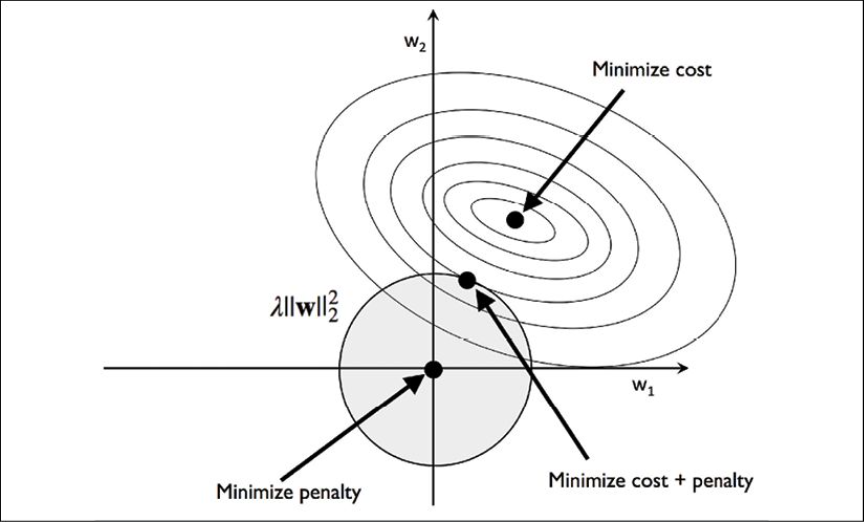

this visualization illustrates how l2 norm prevent overfiting, the minimize point will stay in the shaded area circle. which imporve gernerlization.

> add bias (underfiting) to algorithm

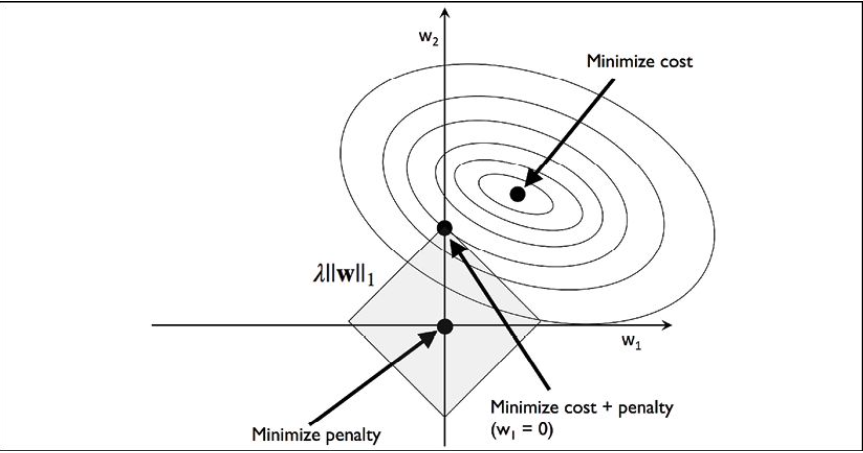

use l1 lead to sparse solution, weight value turn to value

In [39]:
# L1 regularization
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)
s=StandardScaler().fit(X_train)
X_train_std=s.transform(X_train)
X_test_std=s.transform(X_test)

3 wTx, 1 for class 1 vs 2,3, 2 for class 2 vs 1,3, 3 for class 3 vs 1,2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(C=1.0,penalty='l1',solver='liblinear',multi_class='ovr')
lr.fit(X_train_std,y_train)
lr.coef_

array([[ 1.41200928,  0.        ,  0.28227555, -1.36405614,  0.        ,
         0.        ,  1.26239759,  0.        ,  0.        ,  0.        ,
         0.        ,  0.71867627,  2.21888648],
       [-1.68940809, -0.37318794, -0.82475308,  0.6807553 , -0.12000589,
         0.        ,  0.39583582,  0.01136468,  0.24961951, -1.42611894,
         1.06002998,  0.        , -2.23065473],
       [ 0.        ,  0.2320162 ,  0.50745388,  0.        ,  0.16146459,
         0.        , -2.49013139, -0.1192513 ,  0.        ,  1.65041731,
        -0.88825759, -0.37573402,  0.        ]])

as WTX, we well remove feature at weight = zero

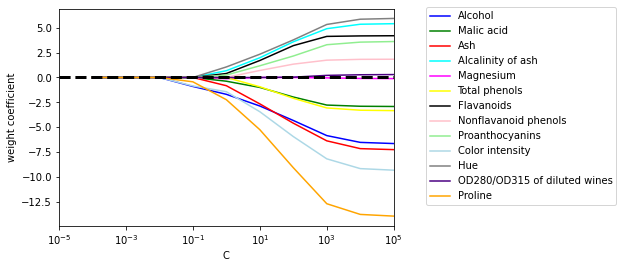

In [ ]:
import matplotlib.pyplot as plt
weight,params=[],[]
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']
for c in np.arange(-4.,6.):
  lr=LogisticRegression(C=10.**c,penalty='l1',solver='liblinear',multi_class='ovr',random_state=0)
  lr.fit(X_train_std,y_train)
  weight.append(lr.coef_[1])
  params.append(10**c)
weight=np.array(weight)
for column,color in zip(range(weight.shape[1]),colors):
  plt.plot(params,weight[:,column],color=color,label=df_wine.columns[column+1])
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

# Sequential feature selection algorithms
SBS (sequential backward selection)

Dimensionality reduction via feature selection

There are two main category of dim-reduct: feature selection and feature extraction

Sequential feature selection is a family of algorithms that use to reduct dim, from d -> k, dim k < dim d.

The main idea is:
> choose subset feature that most relevant to problem.
> increase computation speed
> remove irrelevant feature of noise which can be use full for ml model not support regularzation.



about SBS function:
minimize the criterion function J. which measure different score between model before feature deletion and after deleted


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
import numpy as np
class SBS():
  def __init__(self, estimator, k_feature, scoring=accuracy_score,test_size=0.25,random_state=1):
    self.scoring=scoring
    self.estimator=clone(estimator)
    self.test_size=test_size
    self.k_feature=k_feature
    self.random_state=random_state
  def fit(self,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=self.random_state,test_size=self.test_size,stratify=y)
    self.indice_=tuple(range(X.shape[1]))
    dim=X.shape[1]
    self.subset=[self.indice_]
    s=self.calculate_score(X_train,X_test,y_train,y_test,self.indice_)
    self.score_=[s]
    while dim > self.k_feature:
      scores=[]
      subsets=[]
      for p in combinations(self.indice_,r=dim-1):
        score_a=self.calculate_score(X_train,X_test,y_train,y_test,p)
        scores.append(score_a)
        subsets.append(p)
      m=np.argmax(scores)
      score=scores[m]
      subset=subsets[m]
      self.score_.append(score)
      self.subset.append(subset)
      dim-=1
    self.k_score=self.score_[-1]
    return self
  def transform(self,X):
    return X[:,self.indice]
  def calculate_score(self,X_train,X_test,y_train,y_test,indice):
    self.estimator.fit(X_train[:,indice],y_train)
    y=self.estimator.predict(X_test[:,indice])
    score=self.scoring(y_test,y)
    return score

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
sbs=SBS(knn,k_feature=1)
sbs.fit(X_train_std,y_train)
sbs.score_


[0.9032258064516129,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8064516129032258]

In [30]:
sbs.subset

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10),
 (0, 1, 2, 3, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 5, 6, 8, 10),
 (0, 1, 2, 3, 5, 6, 9),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5),
 (0, 1, 3, 6),
 (0, 6, 10),
 (0, 10),
 (6,)]

In [40]:
df_wine.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [41]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


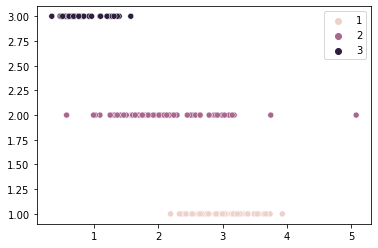

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df_wine['Flavanoids'].values,df_wine['Class label'].values,hue=df_wine['Class label'].values)

In [ ]:
from itertools import combinations
for p in combinations(m,r=10-1):
  print(p)

(0, 1, 2, 3, 4, 5, 6, 7, 8)
(0, 1, 2, 3, 4, 5, 6, 7, 9)
(0, 1, 2, 3, 4, 5, 6, 8, 9)
(0, 1, 2, 3, 4, 5, 7, 8, 9)
(0, 1, 2, 3, 4, 6, 7, 8, 9)
(0, 1, 2, 3, 5, 6, 7, 8, 9)
(0, 1, 2, 4, 5, 6, 7, 8, 9)
(0, 1, 3, 4, 5, 6, 7, 8, 9)
(0, 2, 3, 4, 5, 6, 7, 8, 9)
(1, 2, 3, 4, 5, 6, 7, 8, 9)
